In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/City Tech/Spring 2025/Machine Learning Fundamentals CST 4702/Datasets & Collabs/Medical Cost Personal Datasets - Linear Regression/insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
print(dataset.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [5]:
# Preprocessing template

# # Check for missing values
# print("Missing values before imputation:\n", data.isnull().sum())

# print('-'*35)
# # Handling the categorical column

# # df_copy = data.copy()
# lbe = LabelEncoder() #   Use a label encoding instead of binarizer because encoding can handle more than 2 variables in categorical columns

# # Fitting the column
# categorical_columns = ['workclass', 'education','marital-status', 'occupation',
#                        'relationship', 'race', 'gender', 'native-country', 'income']

# for col in categorical_columns:
#   data[col] = lbe.fit_transform(data[col])

# # Split dataset into features and target
# X = data.drop('income', axis=1)
# y = data['income']

# # Apply KNN imputation
# knn_imputer = KNNImputer(n_neighbors=5)
# X_imputed = knn_imputer.fit_transform(X)

# # Convert the imputed data back to a DataFrame
# X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# # Check missing values after imputation
# print("Missing values after imputation:\n", X_imputed_df.isnull().sum())

In [6]:
# Preprocessing
# dataset = dataset.drop('region')

df_copy = dataset.copy()

lbnz = LabelBinarizer()

# Fitting the collumn sex and the column smoker
lbnz_output = lbnz.fit_transform(df_copy['sex'])
lbnz_output2 = lbnz.fit_transform(df_copy['smoker'])


dataset['sex'] = lbnz_output.ravel()
dataset['smoker'] = lbnz_output2.ravel()

In [7]:
# Try the categorical values with different values instead on Sex, smoker and Region

In [8]:
# Original dataframe with the binarized data
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [9]:
dataset = dataset.drop('region', axis=1)

In [10]:
# Implementation of the Linear Regression
# Assign the features and the target

X = dataset.drop('charges', axis=1)
y = dataset['charges']


# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [11]:
# Initialize the model

lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictions

y_pred = lnr.predict(X_test)
y_pred

array([ 8504.25952786,  6897.83941087, 36805.01178274,  9525.01640181,
       26834.15783554, 11236.53827843,   -56.51533813, 16996.53931939,
         558.86901551, 11292.49638115, 28504.83781808,  9398.41804442,
        5353.29915879, 38679.23753917, 40572.74207294, 37372.20787154,
       15387.38620563, 36033.31348368,  9292.40371143, 31304.88883148,
        4274.20100087, 10592.29487706,  2708.68730205,  6493.02810907,
       11227.74003336, 12498.97075764, 14877.16806499,  5963.85891638,
        9503.12017865,  2360.10282672,  9434.17913244, 12999.67895742,
        4585.98098388,  3265.96837276,  4840.89651399, 12653.62349137,
        2194.59265213,  9123.3897013 , 33175.85413453, 32812.24167496,
        4132.88277765,  4243.29138982, 14495.05758702, 11538.30865769,
        9023.27584285, 12650.54437942,  5036.97193595,  3406.53561573,
       35766.6625433 ,  9379.5276352 , 16062.93310871,  2535.59415356,
       12177.97650916,  1021.65843332, 13742.82492927, 12262.32230678,
      

In [13]:
# R^2 and MSE results

lnr.score(X, y)

0.7494630787945495

In [14]:
# MSE
from sklearn.metrics import mean_squared_error

y_true = dataset['charges']
mean_squared_error(y_test, y_pred)


34003912.39316075

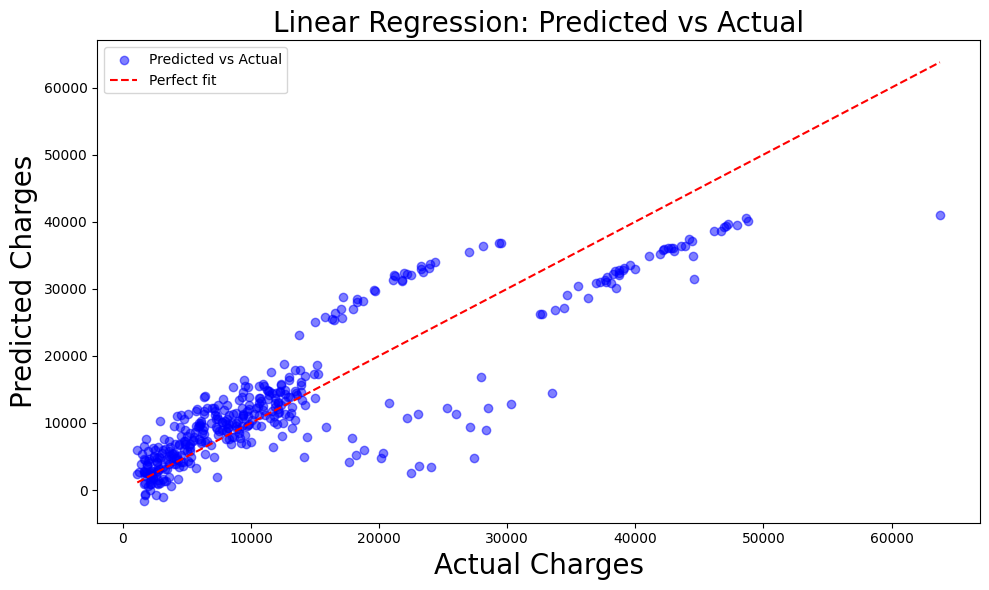

In [15]:
# Visualization of the data

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect fit")
plt.xlabel('Actual Charges', fontsize='20')
plt.ylabel('Predicted Charges', fontsize='20')
plt.title('Linear Regression: Predicted vs Actual', fontsize='20')
plt.legend()
plt.tight_layout()
plt.show()


I notice that, in most of the cases, when the actual charge is high, the predicted charge is lower. But when the actual charge is low, the predicted charge matches it.